In [1]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils import to_categorical

import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train.shape, X_test.shape

170500096/170498071 [==============================] - 6s 0us/step


((50000, 32, 32, 3), (10000, 32, 32, 3))

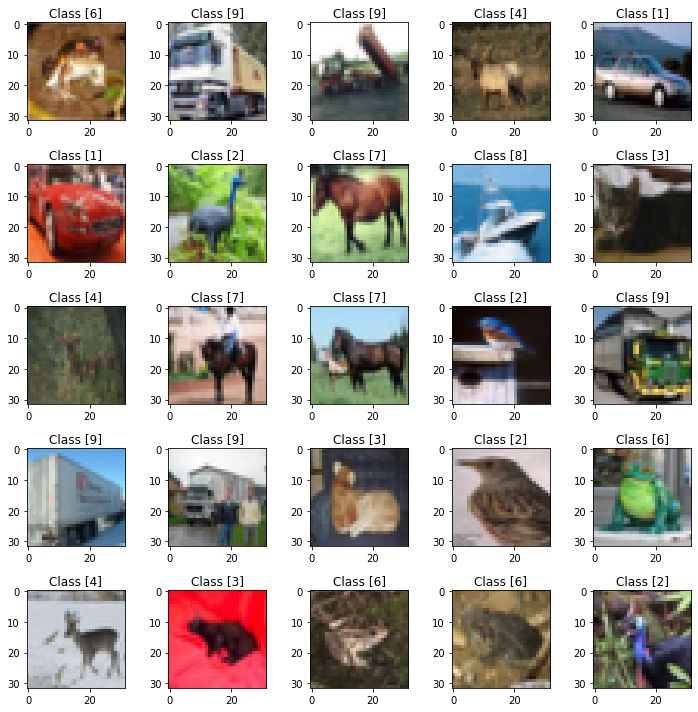

In [3]:
fig = plt.figure(figsize=(10,10))
for idx in range(25):
  plt.subplot(5,5,idx+1)
  plt.imshow(X_train[idx], cmap='gray', interpolation='none')
  plt.title('Class {}'.format(y_train[idx]))

plt.tight_layout()

In [4]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [5]:
img_rows, img_cols = X_train.shape[1], X_train.shape[2]

num_channels = 3
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, num_channels)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, num_channels)
input_shape = (img_rows, img_cols, num_channels)

X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [0]:
if np.max(X_train) > 1: X_train = X_train / 255
if np.max(X_test) > 1: X_test = X_test / 255

In [7]:
X_train.max()

1.0

In [8]:
X_test.max()

1.0

In [0]:
if len(y_train.shape) == 2:
  y_train = y_train.reshape(-1)  #-1 - algo ma się domyślić rozmiaru
  y_test = y_test.reshape(-1)

if len(y_train.shape) == 1:
  num_classes = len(set(y_train))
  y_train = to_categorical(y_train, num_classes)
  y_test = to_categorical(y_test, num_classes)

In [10]:
y_train.shape, y_test.shape, num_classes

((50000, 10), (10000, 10), 10)

In [11]:
model = Sequential([
  Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
  MaxPool2D(pool_size=(2,2)),
  Dropout(0.25),

  Conv2D(64, kernel_size=(3,3), activation='relu'),
  MaxPool2D(pool_size=(2,2)),
  Dropout(0.25),

  Flatten(), #bridge between conv layers and full connected layers

  Dense(1024, activation='relu'),
  Dropout(0.5),
  Dense(num_classes, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [12]:
model.fit(X_train, y_train,
          batch_size=256, epochs=2, verbose=2,
          validation_data=(X_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/2





 - 18s - loss: 1.6932 - acc: 0.3813 - val_loss: 1.3840 - val_acc: 0.5143
Epoch 2/2
 - 4s - loss: 1.3258 - acc: 0.5263 - val_loss: 1.1740 - val_acc: 0.5898


In [13]:
model = Sequential([
  Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
  Conv2D(32, kernel_size=(3,3), activation='relu'), #added now
  MaxPool2D(pool_size=(2,2)),
  Dropout(0.25),

  Conv2D(64, kernel_size=(3,3), activation='relu'),
  Conv2D(64, kernel_size=(3,3), activation='relu'), #added now
  MaxPool2D(pool_size=(2,2)),
  Dropout(0.25),

  Conv2D(128, kernel_size=(3,3), activation='relu'), #added now
  MaxPool2D(pool_size=(2,2)), #added now
  Dropout(0.25), #added now

  Flatten(), #bridge between conv layers and full connected layers

  Dense(1024, activation='relu'),
  Dropout(0.5),
  Dense(num_classes, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)         

In [14]:
model.fit(X_train, y_train,
          batch_size=256, epochs=10, verbose=2,
          validation_data=(X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
 - 6s - loss: 1.9325 - acc: 0.2632 - val_loss: 1.6495 - val_acc: 0.3883
Epoch 2/10
 - 5s - loss: 1.5396 - acc: 0.4347 - val_loss: 1.3680 - val_acc: 0.5075
Epoch 3/10
 - 5s - loss: 1.3542 - acc: 0.5085 - val_loss: 1.2257 - val_acc: 0.5582
Epoch 4/10
 - 5s - loss: 1.2491 - acc: 0.5524 - val_loss: 1.1870 - val_acc: 0.5801
Epoch 5/10
 - 5s - loss: 1.1765 - acc: 0.5804 - val_loss: 1.1085 - val_acc: 0.5990
Epoch 6/10
 - 5s - loss: 1.1171 - acc: 0.6034 - val_loss: 1.0186 - val_acc: 0.6416
Epoch 7/10
 - 5s - loss: 1.0705 - acc: 0.6227 - val_loss: 0.9693 - val_acc: 0.6613
Epoch 8/10
 - 5s - loss: 1.0291 - acc: 0.6379 - val_loss: 0.9901 - val_acc: 0.6526
Epoch 9/10
 - 5s - loss: 0.9963 - acc: 0.6482 - val_loss: 0.9255 - val_acc: 0.6751
Epoch 10/10
 - 5s - loss: 0.9643 - acc: 0.6629 - val_loss: 0.8956 - val_acc: 0.6864


In [15]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 95us/step


[0.895583964920044, 0.6864]